<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/05%20Deep%20Learning/notebooks/9-Embeddings-NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Embeddings para NLP</h1>

En esta notebook exploraremos los embeddings de palabras o documentos, también analizaremos algunos de sus aplicaciones.

Nos concentraremos en uno de los principales métodos de embeddings *word2vec*.

#Introducción

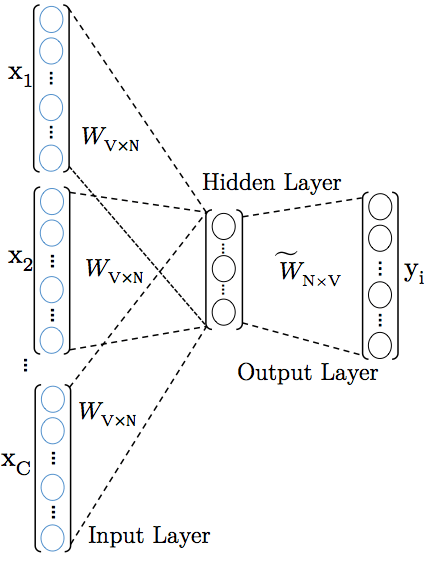

Word2vec es un modelo que asocia representaciones vectoriales a cada palabra en un corpus. Esta asociación se hace entrenando una red neuronal superficial en la tarea de predecir una palabra dado un contexto. La matriz de pesos resultante del entrenamiento contiene representaciones vectoriales aprendidas por la red, es decir, es la codificación que la red ha hecho de cada palabra. **Este es el principio general de los embeddings, son representaciones vectoriales densas de las features vistas por la red durante el entrenamiento.**

Como resultado de este entrenamiento, palabras ocurriendo en contextos similares tienen vectores cercanos. Que dos palabras ocurran en contextos similares se ilustra en este ejemplo:

* La niña juega con la **pelota**
* La niña juega con la **patineta**

En este caso, las palabras *pelota* y *patineta* ocurren en contextos similares y por lo tanto, tendrán vectores similares. Esto es equivalente a la hipótesis de la semántica distributiva, que también puede enunciarse como *se le conoce a una palabra por la compañía que mantiene*.

Se ha demostrado empíricamente que los patrones semánticos y sintácticos pueden reproducirse utilizando la aritmética vectorial. Patrones como *Hombre es a Mujer como Hermano es a Hermana* pueden ser generados a través de operaciones algebraicas en las representaciones vectoriales de estas palabras de tal manera que el vector 

$$v_\text{Hermano} - v_\text{Hombre} + v_\text{Mujer}$$

es el más cercano a la representación vectorial de "Hermana" en el modelo.

Frecuentemente, los embeddings tienen regularidades geométricas representando fenómenos propios del problema que se esta modelando.

# Modelos pre-entrenados

Se pueden descargar modelos pre-entrenados en corpus muy grandes. Una manera de hacerlo es usando los modelos de `gensim`. La manera de hacerlo es la siguiente:

In [ ]:
import gensim.downloader

In [ ]:
for x in gensim.downloader.info()['models'].keys():
    print(x)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [ ]:
# w2v = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
kv = gensim.downloader.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


También podemos buscar estos modelos en diversos sitios, por ejemplo: 

* https://github.com/RaRe-Technologies/gensim-data

## Algunas tareas que se pueden hacer

Podemos encontrar las palabras semánticamente más similares a una palabra dada.

In [ ]:
kv.most_similar('good')

[('great', 0.8995508551597595),
 ('well', 0.8844852447509766),
 ('better', 0.8784541487693787),
 ('nice', 0.8719304800033569),
 ('too', 0.8506093621253967),
 ('night', 0.8455639481544495),
 ('way', 0.8432667255401611),
 ('but', 0.842514157295227),
 ('it', 0.8408531546592712),
 ('morning', 0.8380196690559387)]

Podemos obtener el embedding de una palabra concreta

In [ ]:
kv.get_vector('man')

array([ 0.44699  , -0.10846  , -0.3797   ,  0.091906 , -0.49038  ,
        0.60179  ,  0.0056179,  0.74629  ,  0.66478  ,  0.065319 ,
        0.16921  ,  0.58992  , -4.2407   , -0.0271   ,  0.40518  ,
       -0.0076202,  0.92023  , -0.45819  , -0.034881 , -0.30659  ,
        0.05422  ,  0.74396  ,  0.25329  ,  0.078992 , -0.2678   ,
       -0.82182  , -0.26234  , -0.31675  , -1.3842   , -0.80196  ,
        0.021631 ,  0.42501  , -0.24073  , -0.29752  ,  0.81814  ,
        0.69792  , -0.080286 ,  0.19901  , -0.3429   , -0.15615  ,
       -1.9456   ,  0.39166  , -0.17509  ,  0.18322  ,  0.072098 ,
       -0.0052181,  0.30362  ,  0.98273  ,  0.13574  ,  0.47985  ,
       -0.71209  ,  0.41966  ,  0.41384  ,  0.1137   , -0.534    ,
       -0.57089  , -0.13469  ,  0.43792  , -0.86947  ,  0.21999  ,
       -0.22048  , -0.12789  ,  0.10097  , -0.38393  ,  0.018573 ,
       -0.17419  ,  0.30518  ,  0.17857  , -0.64789  ,  0.25267  ,
        0.11857  , -0.47142  ,  0.74626  ,  0.066337 ,  0.4762

Veamos algunas palabras del vocabulario

In [ ]:
import numpy as np

vocab = list(kv.vocab.keys())
n_words = len(vocab)

idxs = np.random.choice(n_words,size=15,replace=False)
print(f"Longitud del vocabulario: {n_words}")
print(f"Algunas palabras:\n{[vocab[j] for j in idxs]}")

Longitud del vocabulario: 1193514
Algunas palabras:
['قم', 'الخيـر', 'scintillating', 'كلااام', 'świąteczną', 'أستاذتي', 'vise', 'فسوق', 'fijarte', '째', 'ingiustamente', 'chofis', 'إبداعاً', '기도와', 'ذهنياً']


# Entrenar un módelo *from scratch*

En esta sección entrenaremos un modelo de `word2vec` a partir de un corpus y realizaremos varias tareas con este modelo, desde la exploración hasta el análisis de sentimientos.

⭕ ¿Qué diferencias puede tener usar un módelo pre-entrenado contra uno entrenado por nosotros?

Para el entrenamiento, usaremos el corpus de IMDB que usamos la sesión pasada.

In [1]:
#@title Bajamos el corpus de Drive
!pip install -q gdown

!gdown 1TewLD3BbgqV1t2I905Al3vm_VqUzoPzg

Downloading...
From: https://drive.google.com/uc?id=1TewLD3BbgqV1t2I905Al3vm_VqUzoPzg
To: /content/IMDB Dataset.csv
100% 66.2M/66.2M [00:02<00:00, 31.5MB/s]


Cada review se considera un documento. El corpus consiste de 50,000 docuemtnos.  Necesitamos limpiar los documentos quitando stopwords, símbolos, etc.

In [2]:
#@title Bajamos los datos de nltk 
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
#@title Función para limpiar el texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def clean(text):
    clean_text = re.sub(CLEANR, '', text.lower()) # Quitamos etiquetas HTML
    clean_text = re.sub(r'[^\w\s]', '', clean_text.lower()) # Quitamos signos de puntuación y símbolos
    clean_text = re.sub('[0-9]', '', clean_text.lower())  # Quitamos números
    SW = stopwords.words('english') # Leemos la lista de stopwords del inglés
    tokens_no_sw = [word for word in word_tokenize(clean_text) if not word in SW] # Quitamos stopwords
    stems = []
    for w in tokens_no_sw:
        stems.append(lemmatizer.lemmatize(w))
    return stems

In [ ]:
import pandas as pd

df = pd.read_csv('/content/IMDB Dataset.csv')
display(df.sample(5))

,review,sentiment
47521,"There has never been anything like it, that's ...",positive
10512,"I was very concerned about this film, it was s...",negative
8918,Christian Duguay directed this tidy little esp...,positive
42036,I've known about Bettie Page for many a year n...,positive
49460,I would like to comment on the movie April Lov...,positive


In [ ]:
df['clean'] = df['review'].apply(clean)
df.sample(5)

,review,sentiment,clean
4608,I have seen this movie and in all honestly was...,negative,"[seen, movie, honestly, quite, disappointed, o..."
46000,Surviving Christmas is a surprisingly funny mo...,positive,"[surviving, christmas, surprisingly, funny, mo..."
42679,"Narratives  whether written, visual or poetic...",positive,"[narrative, whether, written, visual, poetic, ..."
48021,I really don't know much about the Marquis de ...,negative,"[really, dont, know, much, marquis, de, sade, ..."
44095,"In 1914, Charlie Chaplin began making pictures...",negative,"[charlie, chaplin, began, making, picture, mad..."


Guardemos el modelo para no volver a limpiarlo

In [ ]:
df.to_pickle('IMDB-reviews-procesado.pickle')

In [3]:
#@title Si ya lo hemos guardado previamente, podemos volver a cargarlo
!gdown 1Q8ZYKy0PGQSEGFmPHvj04IaHHYRhRoTb

Downloading...
From: https://drive.google.com/uc?id=1Q8ZYKy0PGQSEGFmPHvj04IaHHYRhRoTb
To: /content/IMDB-reviews-procesado.pickle
100% 119M/119M [00:02<00:00, 50.7MB/s]


In [4]:
import pandas as pd

df = pd.read_pickle('IMDB-reviews-procesado.pickle')

Entrenamos el modelo de word2vec, usando la implementación de word2vec de `gensim` ([documentación](https://radimrehurek.com/gensim/models/word2vec.html)). Algunos de los parámetros del modelo son:

* `size`: es el tamaño de los embeddings.
* `sentences`: es la lista de tokens de cada documento. Es una lista de listas.
* `window`: es el tamaño de la ventana sobre la cual se buscan las co-ocurrencias y se realiza la predicción.
* `min_count`: es la frecuencia mínima de un token para que tenga un embedding.

In [5]:
from gensim.models import Word2Vec

tokens = df['clean'].values

embedding_dim = 150

w2v = Word2Vec(sentences=tokens,
               size=embedding_dim,
               min_count=3,
               window=5)

El modelo entrenado completo puede ser guardado y se puede reanudar el entrenamiento con nuevos documentos. Si ya no continuaremos con el entrenamiento, podemos quedarnos solamente con la instancia que contiene la información sobre palabras y embeddings. Esto son los `keyed vectors`.

In [6]:
modelo = w2v
keyed_vectors = w2v.wv

Obtengamos el vocabulario

In [7]:
import numpy as np

vocab = list(keyed_vectors.vocab.keys())
n_words = len(vocab)

idxs = np.random.choice(n_words,size=15,replace=False)
print(f"Longitud del vocabulario: {n_words}")
print(f"Algunas palabras:\n{[vocab[j] for j in idxs]}")

Longitud del vocabulario: 53363
Algunas palabras:
['released', 'leni', 'fonzie', 'graphic', 'bigelow', 'charley', 'collaborating', 'grohl', 'jacking', 'megha', 'chaotic', 'setter', 'shaloub', 'hooch', 'grenier']


Veamos el vector de alguna palabra (tiene que estar presente en el corpus y aparecer al menos `min_count` veces).

In [ ]:
v = w2v.wv['movie']

print(v.shape)
print(v)

(150,)
[ 1.2049291e+00  1.7037090e+00 -5.2482480e-01 -6.0880870e-01
  6.8985805e-02  2.9391965e-01  1.2731798e-01 -1.3838665e+00
  2.9440567e-01  6.9866598e-01 -2.2422680e-01 -2.2414895e-02
  8.1883825e-02  4.2785403e-01  3.2816884e-01  7.3917842e-01
 -1.7247618e+00 -9.8069751e-01  1.0735947e+00 -4.7892436e-01
 -1.9527113e-01 -1.6545942e-01  9.6754128e-01  8.3697176e-01
 -1.2169160e+00 -8.5017246e-01 -4.7551293e-02  1.4007331e+00
 -4.5826536e-01 -3.5185449e-02 -1.6938780e-01 -3.8077551e-01
 -1.1479564e+00  1.4034276e-01 -3.6507320e-01  3.5767594e-01
 -2.2702552e-01 -6.6468380e-02  5.1388091e-01 -1.0875301e-01
  8.9862919e-01  6.6423345e-01  7.9911506e-01 -1.0553110e+00
  2.2953951e-01  8.4372157e-01 -1.3386165e+00  8.5448658e-01
  1.5124058e+00 -6.7794330e-02  6.1388880e-01  5.4090542e-01
 -4.1206136e-01  4.7455159e-01  1.8400842e-01  2.1264248e+00
 -1.3562810e+00  1.0699825e+00  1.1573958e+00  1.7545691e-01
  2.1727879e-01 -1.1551498e+00  6.8958122e-03 -1.1696365e+00
 -3.7814635e-01 -

Encontremos las palabras más similares a alguna palabra dada

In [ ]:
w2v.most_similar('movie')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('film', 0.7858948111534119),
 ('moviei', 0.6520390510559082),
 ('flick', 0.6301530599594116),
 ('moviethe', 0.5535494089126587),
 ('movieit', 0.5188403129577637),
 ('filmit', 0.4981246888637543),
 ('sequel', 0.4911119341850281),
 ('movieand', 0.4897482991218567),
 ('bmovies', 0.4891901910305023),
 ('iti', 0.48257291316986084)]

Podemos resolver la analogía:

father:man :: mother:woman

In [ ]:
w2v.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.7106002569198608)]

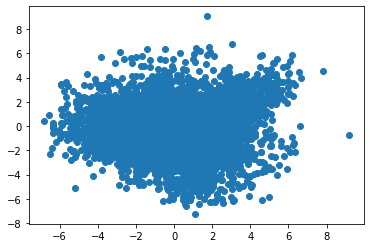

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = w2v.wv.vectors

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

## Clasificación (Análisis de Sentimientos)

En esta parte de la notebook resolveremos el problema de clasificación del dataset IMDB. Usaremos tres tipos de redes basadas en los embeddings que hemos obtenido.

In [8]:
from sklearn.preprocessing import LabelEncoder

labels = df['sentiment'].values
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

### MLP

Podemos representar cada review por medio del promedio de las representaciones vectoriales de las palabras que lo componen. De esta forma, cada review tendrá una representación vectorial, la cual puede entrar a una red *fully connected*.

Preparamos la matriz de representaciones vectoriales de los reviews. Dado que son 50,000 reviews, este proceso es largo. Lo leeremos desde un archivo previamente calculado.

In [9]:
#@title Lo cargamos desde Drive
!gdown 1KS256xsU6UALxBuebcnGkW3vW04s2Kn5

Downloading...
From: https://drive.google.com/uc?id=1KS256xsU6UALxBuebcnGkW3vW04s2Kn5
To: /content/IMDB-w2v-promedio-150.npy
100% 60.0M/60.0M [00:01<00:00, 50.3MB/s]


In [10]:
X_reviews = np.load("/content/IMDB-w2v-promedio-150.npy")

In [ ]:
X_reviews = np.zeros((df.shape[0],embedding_dim))

for j,x in enumerate(tokens):
    X_r = np.array([w2v.wv[word] for word in x if word in vocab])
    X_r = np.mean(X_r,axis=0)
    X_reviews[j,:] = X_r

X_reviews[:5,:7]

array([[-0.01135908, -0.28651544, -0.26752472, -0.27828136,  0.29836777,
        -0.35342136, -0.0273396 ],
       [ 0.15858729, -0.06076187,  0.14151183, -0.20918693,  0.03250474,
        -0.33213162, -0.04717645],
       [ 0.1279992 , -0.10260819, -0.12765704, -0.17845087,  0.28615457,
        -0.49007937, -0.25541919],
       [ 0.35521829, -0.37629816, -0.28780127, -0.05470578,  0.4666265 ,
        -0.53013045,  0.03431054],
       [ 0.10452268, -0.07606044,  0.02798988, -0.66061223,  0.04428174,
        -0.29104981, -0.12487245]])

In [ ]:
np.save("IMDB-w2v-promedio-150.npy",X_reviews)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reviews, y, random_state=64, train_size=0.8)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (40000, 150)
Shape of X_test: (10000, 150)


Definimos el modelo

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(32,input_shape=(embedding_dim,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                4832      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,009
Trainable params: 7,009
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=15)

Epoch 1/15
1125/1125 [==============================] - 6s 2ms/step - loss: 0.3646 - accuracy: 0.8401 - val_loss: 0.3282 - val_accuracy: 0.8643
Epoch 2/15
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3292 - accuracy: 0.8581 - val_loss: 0.3190 - val_accuracy: 0.8695
Epoch 3/15
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3217 - accuracy: 0.8620 - val_loss: 0.3241 - val_accuracy: 0.8687
Epoch 4/15
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3159 - accuracy: 0.8644 - val_loss: 0.3287 - val_accuracy: 0.8648
Epoch 5/15
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8673 - val_loss: 0.3158 - val_accuracy: 0.8712
Epoch 6/15
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3087 - accuracy: 0.8700 - val_loss: 0.3116 - val_accuracy: 0.8755
Epoch 7/15
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3049 - accuracy: 0.8700 - val_loss: 0.3110 - val_accuracy:

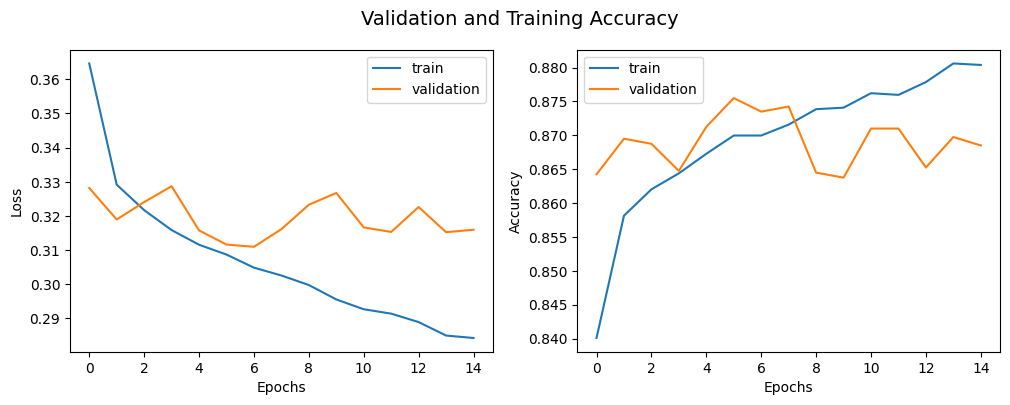

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

predictions = model.predict(X_test)

pred_labels = []

for x in predictions:
    if x >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

test_accuracy = accuracy_score(y_test,pred_labels)
test_recall = recall_score(y_test,pred_labels)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred_labels))

Test Accuracy: 0.865
Test Recall: 0.873

Confusion Matrix:
 [[4242  709]
 [ 640 4409]]


### CNN

Ahora, representemos cada review por un número fijo de embeddings de las palabras que lo componen. De esta manera, cada review estará representado por una matriz. 

⭕ ¿Qué estrategia podríamos usar para escoger cuales palabras representarán al review?

Dado que tenemos muchos documentos y construiremos un tensor, sólo nos quedaremos con una muestra de los documentos para poder manejar los datos en un tiempo razonable.

In [17]:
sample_idxs = np.random.choice(df.shape[0],size=10000,replace=False)

sample_tokens = [tokens[j] for j in sample_idxs]
sample_y = y[sample_idxs]

In [18]:
width = 5

X_tensor_reviews = np.zeros((len(sample_tokens),embedding_dim,width))

for j,x in enumerate(sample_tokens):
    X_r = np.array([w2v.wv[word] for word in x if word in vocab])
    X_r = np.transpose(X_r)[:,:width]
    X_tensor_reviews[j,:,:] = X_r

Guardamos el tensor

In [19]:
np.save("/content/IMDB-w2v-tensor-150-5.npy",X_tensor_reviews)

Leemos el tensor

In [20]:
!gdown 1px17yZbmr4HW0jrDBEYwKFLzAfwpd2-F

Downloading...
From: https://drive.google.com/uc?id=1px17yZbmr4HW0jrDBEYwKFLzAfwpd2-F
To: /content/IMDB-w2v-tensor-150-5.npy
100% 60.0M/60.0M [00:01<00:00, 34.0MB/s]


In [21]:
X_tensor_reviews = np.load("/content/IMDB-w2v-tensor-150-5.npy")

Revisamos que las dimensiones sean correctas

In [22]:
print(X_tensor_reviews.shape)
print(sample_y.shape)

(10000, 150, 5)
(10000,)


Dividimos en entrenamiento y prueba

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor_reviews, sample_y, random_state=64, train_size=0.8)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (8000, 150, 5)
Shape of X_test: (2000, 150, 5)


In [24]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

m, n = X_train.shape[1], X_train.shape[2]

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(m,n,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 3, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 1, 25)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1850)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               185100    
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 185,451
Trainable params: 185,451
Non-trainable params: 0
________________________________________________

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',patience=2)

history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_split=0.1,
            callbacks=[es])

Epoch 1/25
225/225 [==============================] - 11s 4ms/step - loss: 0.6436 - accuracy: 0.6240 - val_loss: 0.6203 - val_accuracy: 0.6612
Epoch 2/25
225/225 [==============================] - 1s 3ms/step - loss: 0.6057 - accuracy: 0.6671 - val_loss: 0.6370 - val_accuracy: 0.6425
Epoch 3/25
225/225 [==============================] - 1s 3ms/step - loss: 0.5900 - accuracy: 0.6749 - val_loss: 0.6196 - val_accuracy: 0.6687
Epoch 4/25
225/225 [==============================] - 1s 3ms/step - loss: 0.5759 - accuracy: 0.6851 - val_loss: 0.6225 - val_accuracy: 0.6612
Epoch 5/25
225/225 [==============================] - 1s 3ms/step - loss: 0.5666 - accuracy: 0.6915 - val_loss: 0.6321 - val_accuracy: 0.6562


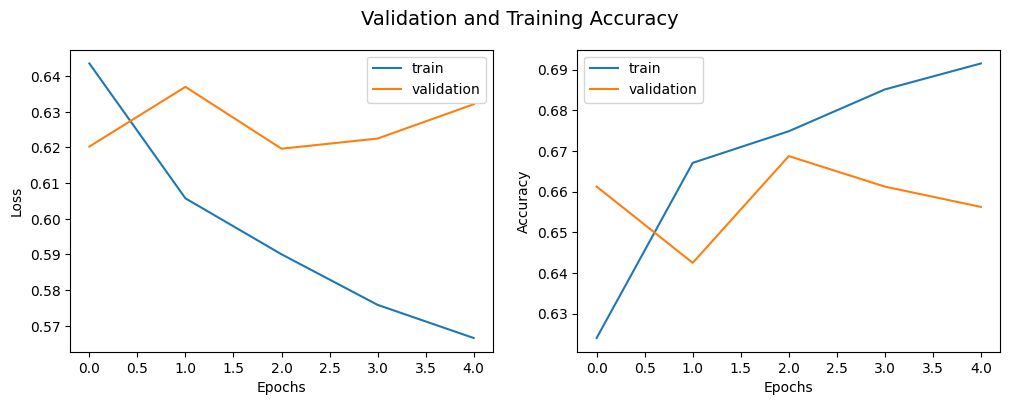

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

predictions = model.predict(X_test)

pred_labels = []

for x in predictions:
    if x >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

test_accuracy = accuracy_score(y_test,pred_labels)
test_recall = recall_score(y_test,pred_labels)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred_labels))

Test Accuracy: 0.632
Test Recall: 0.591

Confusion Matrix:
 [[683 333]
 [402 582]]


### LSTM

Ahora, realizaremos la clasificación usando una red con una capa LSTM. Repetiremos la estrategia de la sesión pasada, pero ahora incorporaremos los embeddings que acabamos de calcular

Obtenemos los conjuntos $X$ y $y$

In [30]:
from sklearn.preprocessing import LabelEncoder

labels = df['sentiment'].values
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [31]:
from sklearn.model_selection import train_test_split

reviews = df['clean'].values

train_reviews, test_reviews, y_train, y_test = train_test_split(reviews, y, train_size=0.8, random_state=74)

print(f"Shape of X_train: {train_reviews.shape}")
print(f"Shape of X_test: {test_reviews.shape}")

Shape of X_train: (40000,)
Shape of X_test: (10000,)


Tokenizamos los documentos para obtener las secuencias de índices

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ----- Hiperparámetros para este preprocesamiento
vocab_size = 3000   # Nos limitaremos a ese número de palabras del vocabulario
oov_tok = ''        # Las palabras fuera del vocabulario se reemplazarán con este string
max_length = 200    # La longitud común deseada para las secuencias al hacer el padding

#  ----- Entrenamos el tokenizador 
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_reviews)

#  ----- Creamos las secuencias de entrenamiento y hacemos el padding
train_sequences = tokenizer.texts_to_sequences(train_reviews)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

#  ----- Creamos las secuencias de prueba y hacemos el padding
test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

Preparamos la capa Embedding, ahora en lugar de generar embeddings, sólo los recuperará de nuestro embeddings entrenados

In [33]:
from keras.layers import Embedding

vocab_len = len(vocab)

embedding_matrix = np.zeros((vocab_len, embedding_dim))

for word, index in tokenizer.word_index.items():
    try:
        embedding_vector = w2v.wv.get_vector(word)
        if embedding_vector is not None:
            embedding_matrix[index, :] = embedding_vector
    except:
        pass

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embedding_dim, input_length=max_length, 
                            weights = [embedding_matrix], trainable=False)

Esta capa de embeddings se incorpora a la arquitectura de la red

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# ----- model initialization
model = Sequential([
    embedding_layer,
    LSTM(64, dropout=0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# ----- compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 150)          8004450   
                                                                 
 lstm (LSTM)                 (None, 64)                55040     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,061,603
Trainable params: 57,153
Non-trainable params: 8,004,450
_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',patience=3)

num_epochs = 25

history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1,
                    callbacks=[es])

Epoch 1/25
1125/1125 [==============================] - 14s 10ms/step - loss: 0.6736 - accuracy: 0.5524 - val_loss: 0.6858 - val_accuracy: 0.5383
Epoch 2/25
1125/1125 [==============================] - 11s 9ms/step - loss: 0.6667 - accuracy: 0.5614 - val_loss: 0.6905 - val_accuracy: 0.5002
Epoch 3/25
1125/1125 [==============================] - 11s 10ms/step - loss: 0.6855 - accuracy: 0.5256 - val_loss: 0.6894 - val_accuracy: 0.5002
Epoch 4/25
1125/1125 [==============================] - 11s 9ms/step - loss: 0.6882 - accuracy: 0.5230 - val_loss: 0.6846 - val_accuracy: 0.5080
Epoch 5/25
1125/1125 [==============================] - 15s 13ms/step - loss: 0.4725 - accuracy: 0.7635 - val_loss: 0.3377 - val_accuracy: 0.8540
Epoch 6/25
1125/1125 [==============================] - 14s 12ms/step - loss: 0.3459 - accuracy: 0.8549 - val_loss: 0.3121 - val_accuracy: 0.8730
Epoch 7/25
1125/1125 [==============================] - 12s 10ms/step - loss: 0.3224 - accuracy: 0.8647 - val_loss: 0.2980 - v

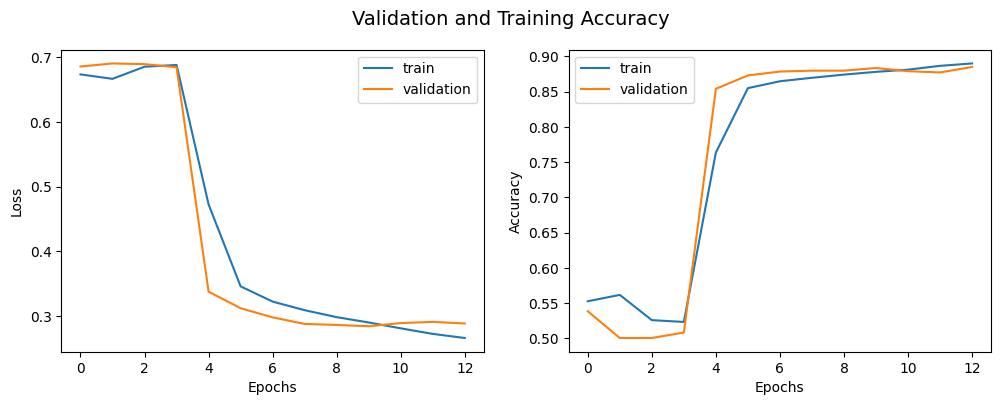

In [36]:
plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

predictions = model.predict(test_padded)

pred_labels = []

for x in predictions:
    if x >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

test_accuracy = accuracy_score(y_test,pred_labels)
test_recall = recall_score(y_test,pred_labels)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred_labels))

Test Accuracy: 0.877
Test Recall: 0.912

Confusion Matrix:
 [[4223  794]
 [ 438 4545]]
